<a href="https://colab.research.google.com/github/gmac1el/Big-Data/blob/main/WebScraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

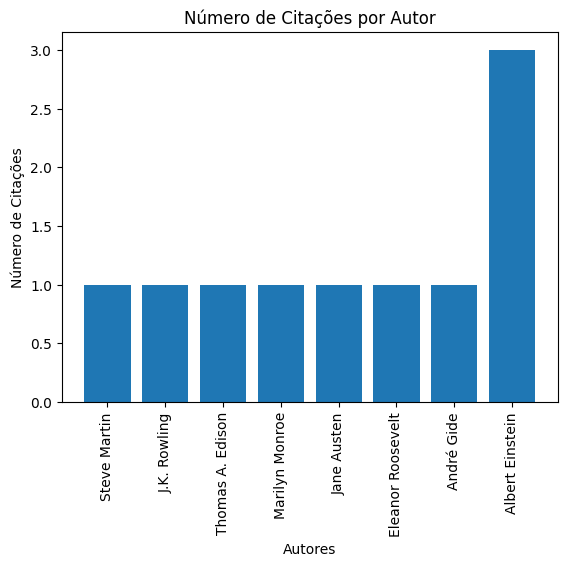

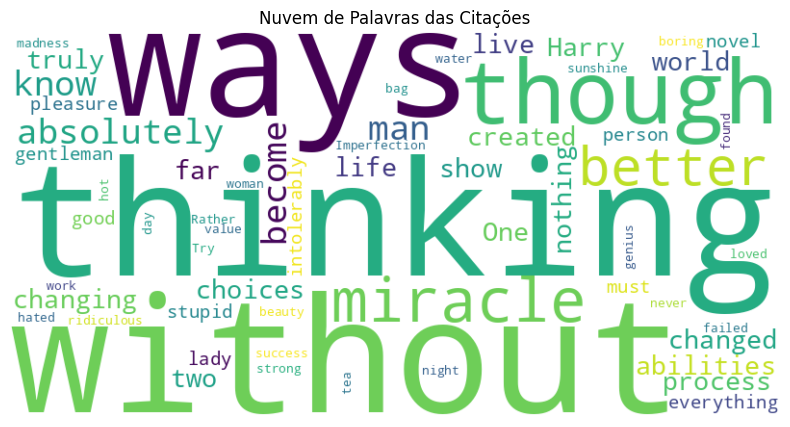

In [25]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Fazendo uma requisição para a página
url = "http://quotes.toscrape.com/"
response = requests.get(url)

# Verificação da requisição (200-bem sucedida)
if response.status_code == 200:
    # Criando objeto com BeautifulSoup
    soup = BeautifulSoup(response.text, "html.parser")

    # Extraindo dados do site (por exemplo, as citações e os autores)
    quotes = []
    authors = []

    for quote in soup.find_all("span", class_="text"):
        quotes.append(quote.text)

    for author in soup.find_all("small", class_="author"):
        authors.append(author.text)

    # Visualização 1: Histograma de autores
    author_counts = {author: authors.count(author) for author in set(authors)}
    plt.bar(author_counts.keys(), author_counts.values())
    plt.xticks(rotation=90)
    plt.xlabel("Autores")
    plt.ylabel("Número de Citações")
    plt.title("Número de Citações por Autor")
    plt.show()

    # Visualização 2: Nuvem de palavras das citações
    from wordcloud import WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(quotes))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Nuvem de Palavras das Citações")
    plt.show()

else:
    print("Falha ao acessar a página.")

